# Phase 0

We are a Bank
Churn is becoming a thing
Our rule-based engines cannot cope with it
Campaign cost

So marketing department asks to data science department: **"is it possible to leverage machine learning to improve our churn prevention systems?"**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# requirements
!pip install scikit-learn
!pip install scikit-plot

In [ ]:
import scikitplot as skplt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RBS/DataScienceLanguages/datasets/Churn_Banking_Modeling.csv', encoding=('latin-1'))

In [ ]:
df = df.rename(columns={'Flag_Richiesta_Estinzione_cc': 'target'})

In [ ]:
df['target'].value_counts()

no    375386
si      1983
Name: target, dtype: int64

In [ ]:
# 0 = close the account
# 1 = account open

In [ ]:
df['target'] = df['target'].replace({'no': 0, 'si': 1})

In [ ]:
df['target'].value_counts()

0    375386
1      1983
Name: target, dtype: int64

In [ ]:
df.columns

Index(['Id_Cliente', 'target', 'Imp_Valore_del_Cliente',
       'Flag_Apertura_Conto_Online', 'Flag_Possesso_piu_Conti', 'Eta',
       'Provincia_Domicilio', 'Provincia_Residenza',
       'Anno_Apertura_primo_Conto', 'Professione', 'Imp_Reddito',
       'Tipologia_Cliente', 'Sesso', 'Profilo_MIFID', 'Imp_Canone_Pricing_cc',
       'Imp_Bonifici_vs_Competitors', 'Imp_Bonifici_vs_No_Competitors',
       'Num_Utenze_in_essere', 'Flag_Accredito_Stipendio',
       'Imp_Spending_Carta_Credito', 'Imp_Spending_Bancomat',
       'Num_Accessi_Sito', 'Num_Movimenti_Dispositivi', 'Num_attività_trading',
       'Var_Numero_Utenze', 'Flag_Mutuo', 'Flag_Prestito', 'Flag_Giroconto',
       'Flag_Richiesta_info_chiusura_conto', 'Iscrizione_programma_Loyalty',
       'Flag_Contatto_Call_Center', 'Flag_variazione_Accredito_Stipendio',
       'Num_Punti_Programma_Loyalty', 'Imp_Liquidità_Attuale',
       'Imp_Gestito_attuale', 'Imp_Amministrato_attuale',
       'Imp_Liquidità_Attuale_6m', 'Imp_Gestito_att

In [ ]:
df.dtypes

In [ ]:
# for sake fo simplicity
# here we choose to just work on numerical variables

var_to_use = ['target', 'Imp_Valore_del_Cliente',
       'Flag_Apertura_Conto_Online', 'Flag_Possesso_piu_Conti', 'Eta',
       'Anno_Apertura_primo_Conto', 'Imp_Canone_Pricing_cc',
       'Imp_Bonifici_vs_Competitors', 'Imp_Bonifici_vs_No_Competitors',
       'Num_Utenze_in_essere', 'Flag_Accredito_Stipendio',
       'Imp_Spending_Carta_Credito', 'Imp_Spending_Bancomat',
       'Num_Accessi_Sito', 'Num_Movimenti_Dispositivi', 'Num_attività_trading',
       'Var_Numero_Utenze', 'Flag_Mutuo', 'Flag_Prestito', 'Flag_Giroconto',
       'Flag_Richiesta_info_chiusura_conto', 'Iscrizione_programma_Loyalty',
       'Flag_Contatto_Call_Center', 'Flag_variazione_Accredito_Stipendio',
       'Num_Punti_Programma_Loyalty', 'Imp_Liquidità_Attuale',
       'Imp_Gestito_attuale', 'Imp_Amministrato_attuale',
       'Imp_Liquidità_Attuale_6m', 'Imp_Gestito_attuale_6m',
       'Imp_Amministrato_attuale_6m', 'Flag_Trasferimento_Titoli_Out',
       'Flag_Rifiuto_Carte', 'Flag_Rifiuto_Prestiti','Flag_Disattivazione_RID']

In [ ]:
feature_names = var_to_use.copy()
feature_names.remove('target')
feature_names

['Imp_Valore_del_Cliente',
 'Flag_Apertura_Conto_Online',
 'Flag_Possesso_piu_Conti',
 'Eta',
 'Anno_Apertura_primo_Conto',
 'Imp_Canone_Pricing_cc',
 'Imp_Bonifici_vs_Competitors',
 'Imp_Bonifici_vs_No_Competitors',
 'Num_Utenze_in_essere',
 'Flag_Accredito_Stipendio',
 'Imp_Spending_Carta_Credito',
 'Imp_Spending_Bancomat',
 'Num_Accessi_Sito',
 'Num_Movimenti_Dispositivi',
 'Num_attività_trading',
 'Var_Numero_Utenze',
 'Flag_Mutuo',
 'Flag_Prestito',
 'Flag_Giroconto',
 'Flag_Richiesta_info_chiusura_conto',
 'Iscrizione_programma_Loyalty',
 'Flag_Contatto_Call_Center',
 'Flag_variazione_Accredito_Stipendio',
 'Num_Punti_Programma_Loyalty',
 'Imp_Liquidità_Attuale',
 'Imp_Gestito_attuale',
 'Imp_Amministrato_attuale',
 'Imp_Liquidità_Attuale_6m',
 'Imp_Gestito_attuale_6m',
 'Imp_Amministrato_attuale_6m',
 'Flag_Trasferimento_Titoli_Out',
 'Flag_Rifiuto_Carte',
 'Flag_Rifiuto_Prestiti',
 'Flag_Disattivazione_RID']

In [ ]:
# remove all the variables that won't be used

df = df[var_to_use].copy()
df.head(10)

,target,Imp_Valore_del_Cliente,Flag_Apertura_Conto_Online,Flag_Possesso_piu_Conti,Eta,Anno_Apertura_primo_Conto,Imp_Canone_Pricing_cc,Imp_Bonifici_vs_Competitors,Imp_Bonifici_vs_No_Competitors,Num_Utenze_in_essere,...,Imp_Liquidità_Attuale,Imp_Gestito_attuale,Imp_Amministrato_attuale,Imp_Liquidità_Attuale_6m,Imp_Gestito_attuale_6m,Imp_Amministrato_attuale_6m,Flag_Trasferimento_Titoli_Out,Flag_Rifiuto_Carte,Flag_Rifiuto_Prestiti,Flag_Disattivazione_RID
0,0,65.03,0,0,38.0,2004.0,0.000000,NaN,812.800000,3.0,...,1634.57,2978.40,2980.92,1550.44,2853.20,2853.22,0,0,0,0
1,0,138.88,0,0,45.0,2000.0,0.000000,6260.82,828.120000,7.0,...,11918.26,NaN,34916.15,26122.17,NaN,22053.82,0,0,0,0
2,0,546.54,0,0,61.0,2005.0,0.000000,4330.00,1076.666666,9.0,...,2671.95,NaN,232776.62,16545.25,NaN,216304.33,1,0,0,0
3,0,68.69,0,0,33.0,2010.0,0.000000,NaN,NaN,NaN,...,19211.31,15013.53,15017.53,12500.00,NaN,NaN,0,0,0,0
4,0,2417.05,0,0,36.0,2001.0,NaN,NaN,1200.000000,NaN,...,1526.38,NaN,NaN,1427.70,NaN,21514.60,0,0,0,0
5,0,299.23,0,0,48.0,2005.0,0.000000,NaN,NaN,3.0,...,3716.30,5337.30,5339.33,4135.56,5261.63,5261.65,0,0,0,0
6,0,0.02,0,0,51.0,2004.0,0.000000,NaN,NaN,NaN,...,-21.10,5502.26,5502.28,5.91,5167.02,5167.02,0,0,0,0
7,0,14.29,1,0,44.0,2008.0,0.000000,116.40,959.232500,4.0,...,1435.94,NaN,7722.35,1500.32,NaN,7247.63,0,0,0,0
8,0,59.04,0,0,63.0,2002.0,0.000000,51.64,880.000000,5.0,...,25354.88,NaN,NaN,24682.42,NaN,NaN,0,0,0,0
9,0,68.99,0,0,32.0,2007.0,4.283333,NaN,350.000000,NaN,...,165.73,NaN,NaN,317.57,NaN,NaN,0,0,0,0


In [ ]:
df[feature_names] = df[feature_names].fillna(0)

In [ ]:
# create the "features" dataframe with just feature variables (remove target)
# we use the "drop" method
# pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# contains all the predictive variables

features = df.drop('target', axis=1) # axis=1 means I want to remove columns, axis=0 means rows

In [ ]:
target = df['target'].values
target

array([0, 0, 0, ..., 0, 0, 0])

# Phase 2 - Modeling



In [ ]:
# in order to prevent overfitting
# we generate train and test sample

from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(features, target, train_size=0.7, random_state=1)

# 'X' refers to feature
# 'Y' refers to target
# with train_size=0.7 (train_X) I'm saying I want 70% of the total rows
# the remaining 30% will go to test_X


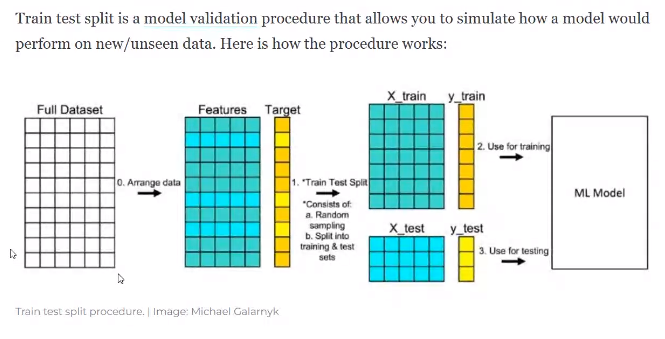

In [ ]:
# training a classification tree
from sklearn.tree import DecisionTreeClassifier

# sklearn = package
# tree = subpackage
# DecisionTreeClassifier = method

# we instantiate the classifier
dtc = DecisionTreeClassifier()

# we train it
dtc.fit(train_X, train_y) # fit is a method inside the dtc method

DecisionTreeClassifier()

In [ ]:
dtc.get_depth()

41

In [ ]:
dtc.get_n_leaves()
# leaf node is a
# defines our model complexity

2516

In [ ]:
from sklearn import tree

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=feature_names,
                                class_names=['no', 'si'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
test_X.columns

Index(['Imp_Valore_del_Cliente', 'Flag_Apertura_Conto_Online',
       'Flag_Possesso_piu_Conti', 'Eta', 'Anno_Apertura_primo_Conto',
       'Imp_Canone_Pricing_cc', 'Imp_Bonifici_vs_Competitors',
       'Imp_Bonifici_vs_No_Competitors', 'Num_Utenze_in_essere',
       'Flag_Accredito_Stipendio', 'Imp_Spending_Carta_Credito',
       'Imp_Spending_Bancomat', 'Num_Accessi_Sito',
       'Num_Movimenti_Dispositivi', 'Num_attività_trading',
       'Var_Numero_Utenze', 'Flag_Mutuo', 'Flag_Prestito', 'Flag_Giroconto',
       'Flag_Richiesta_info_chiusura_conto', 'Iscrizione_programma_Loyalty',
       'Flag_Contatto_Call_Center', 'Flag_variazione_Accredito_Stipendio',
       'Num_Punti_Programma_Loyalty', 'Imp_Liquidità_Attuale',
       'Imp_Gestito_attuale', 'Imp_Amministrato_attuale',
       'Imp_Liquidità_Attuale_6m', 'Imp_Gestito_attuale_6m',
       'Imp_Amministrato_attuale_6m', 'Flag_Trasferimento_Titoli_Out',
       'Flag_Rifiuto_Carte', 'Flag_Rifiuto_Prestiti',
       'Flag_Disattivazion

In [ ]:
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test = dtc.predict(test_X) # here we provide new data to make predictions and asses if the model is good or not
score_test = dtc.predict_proba(test_X)

# (this is less useful) - predict on training dataset
label_pred_train = dtc.predict(train_X)
score_train = dtc.predict_proba(train_X)

# let's take a look at the generated scores
set(score_test[:,1])

{0.0, 0.2, 0.5, 1.0}

In [ ]:
print(test_X.shape)
print(label_pred_test.shape)
label_pred_test

(113211, 34)
(113211,)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# we look at confusion matrix for the test data set

from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(test_y, label_pred_test)
print(cm_test)

[[111912    715]
 [   528     56]]


In [ ]:
# we look at confusion matrix for the training data set

from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(train_y, label_pred_train)
print(cm_test)

[[262759      0]
 [     2   1397]]


In [ ]:
# Step 2
# training a classification tree
from sklearn.tree import DecisionTreeClassifier

# sklearn = package
# tree = subpackage
# DecisionTreeClassifier = method

# we instantiate the classifier
dtc2 = DecisionTreeClassifier(max_depth=2) # << hyper parameters (how we instruct the paramenters to reach the model we want to get)

# we train it
dtc2.fit(train_X, train_y)


DecisionTreeClassifier(max_depth=2)

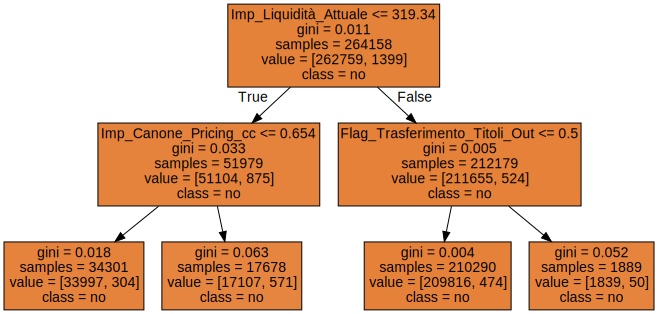

In [ ]:
dot_data = tree.export_graphviz(dtc2, out_file=None,
                                feature_names=feature_names,
                                class_names=['no', 'si'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# we use the model to make predictions (and generate scores) on the test dataset
label_pred_test2 = dtc2.predict(test_X) # here we provide new data to make predictions and asses if the model is good or not
score_test2 = dtc2.predict_proba(test_X)
  # it gives a score

# (this is less useful) - predict on training dataset
label_pred_train2 = dtc2.predict(train_X)
score_train2 = dtc2.predict_proba(train_X)



In [ ]:
# we look at confusion matrix for the test data set

from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(test_y, label_pred_test2)
print(cm_test)

[[112627      0]
 [   584      0]]


In [ ]:
# we look at confusion matrix for the train data set

from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(train_y, label_pred_train2)
print(cm_test)

[[262759      0]
 [  1399      0]]


In [ ]:
label_pred_test2 # gives the final prediction of the model

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score_test2

# the result is a 2 column matrix
# for each customer (row)
# we have both the probability that the customer WILL NOT leave (first column)
# and the probability that the customer WILL leave (second column)

# a score that represents a score/probability that the customer will leaver or not

array([[0.99774597, 0.00225403],
       [0.99774597, 0.00225403],
       [0.99774597, 0.00225403],
       ...,
       [0.99113728, 0.00886272],
       [0.99774597, 0.00225403],
       [0.99774597, 0.00225403]])

In [ ]:
score_test2_df = pd.DataFrame(score_test2, columns=["NOT_LEAVE", "LEAVE"])
score_test2_df

,NOT_LEAVE,LEAVE
0,0.997746,0.002254
1,0.997746,0.002254
2,0.997746,0.002254
3,0.997746,0.002254
4,0.997746,0.002254
...,...,...
113206,0.997746,0.002254
113207,0.997746,0.002254
113208,0.991137,0.008863
113209,0.997746,0.002254


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

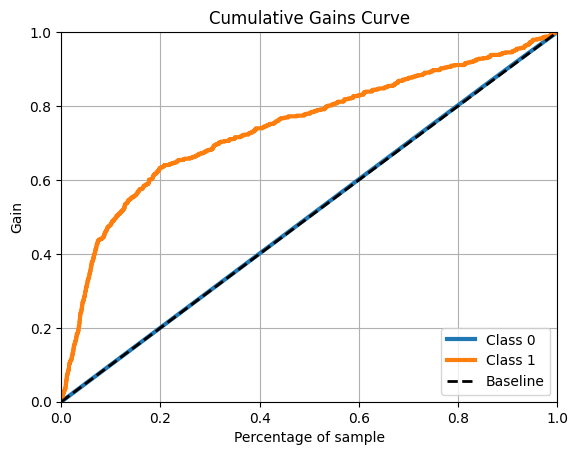

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(test_y, score_test2)

In [ ]:
# We try undersampling to face  class imbalance problem
# We choose to perform undersampling
# We may do it manually
# but...guess what? We will use a package
# imbalanced-learn.org/stable
# may need to install the  package (pip install imbalanced-learn)
# (just for anaconda) maybe we have to add
# conda.anaconda.org/conda-forge
# to channels
# we import the package
from imblearn.under_sampling import RandomUnderSampler

# we choose to set 20% as undersampling percentage
undersample = RandomUnderSampler(sampling_strategy=0.2)

# we generate balanced train dataset
train_X_bal, train_y_bal = undersample.fit_resample(train_X, train_y)

# why are we not undersampling the test set?

In [ ]:
train_X_bal.shape

(8394, 34)

In [ ]:
train_y_bal.shape

(8394,)

In [ ]:
# Step 3
# training a classification tree
from sklearn.tree import DecisionTreeClassifier

# we instantiate the classifier
dtc3 = DecisionTreeClassifier(max_depth=10)

# we train it
dtc3.fit(train_X_bal, train_y_bal)

DecisionTreeClassifier(max_depth=10)

In [ ]:
# we use the model to make predictions and get scores on
# the test dataset

label_pred_test_3 = dtc3.predict(test_X)
score_test_3 = dtc3.predict_proba(test_X)

# (less useful) - same on  training dataset
label_pred_train_3 = dtc3.predict(train_X_bal)
score_train_3 = dtc3.predict_proba(train_X_bal)

# let's take a look at the generated scores

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

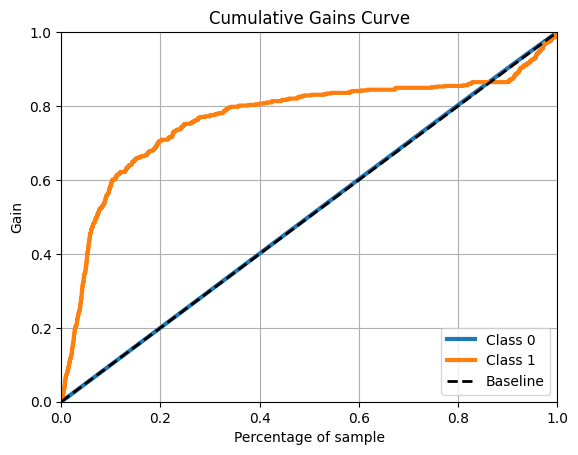

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(test_y, score_test_3)

# Model ROI Evaluation

In [ ]:
# let's say a customer raches a threshold of e.g., 0.7, we send the customer
# to the marketing dept. to try to retain the customer

# we need to identify what the optimum threshold is (inside the score)

# each marketing action taken to retain the customer has a cost
# e.g., time of employee making a call



In [ ]:
# model ROI analysis
# hypotizing costs and benefits
contact_cost = 1 # euro
revenue_profit = 40 # by retaining the customer which would have left, we make a profit of 40 euros

In [ ]:
target

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_y.shape

(113211,)

In [ ]:
# preparing our analysis table

analisi_roi = pd.DataFrame()
analisi_roi['target'] = test_y ## its a "numpy
analisi_roi['score']= score_test_3[:,1]

# we need "predefined" score bins - classes
# class_score = np.linspace(0.0,1.0,num=10, endpoint=True)

import numpy as np

class_score = np.arange(0.0,1.01,step=0.01)

In [ ]:
score_test_3.shape

(113211, 2)

In [ ]:
# analisi_roi['target'] = analisi_roi['target'].fillna(0)

In [ ]:
analisi_roi

,target,score
0,0,1.000000
1,0,0.005128
2,0,0.015625
3,0,0.023544
4,0,0.023544
...,...,...
113206,0,0.005128
113207,0,0.169014
113208,0,0.073171
113209,0,0.047619


In [ ]:
import numpy as np
class_score = np.arange(0.0,1.01,step=0.01)

In [ ]:
class_score

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
# we bin scores according to predefined classes
analisi_roi['score_bin'] = pd.cut(analisi_roi['score'],bins=class_score,labels=False, include_lowest=True)

# let's have a look at the score bins
# analisi_roi.score_bin.value_counts(dropna=False).sort_index()

In [ ]:
# we count the number of real positives in the test sample
tot_positivi_test = np.sum(test_y == 1)

In [ ]:
# let's compute the results for each score bin
# we group by score_bin
analisi_roi_agg = analisi_roi.groupby('score_bin').agg(segnalati=('target','count'),hit=('target','sum'))
analisi_roi_agg.sort_values('score_bin', ascending=False, inplace=True)

In [ ]:
analisi_roi_agg.head()
# segnalati > how many people we have inside the bin, or scored
# hit > how many people left
# the higher the score bin, the higher the risk of losing the

,segnalati,hit,segnalati_cum,hit_cum
score_bin,,,,
99,4307,149,4307,149
91,234,13,4541,162
90,88,3,4629,165
89,257,19,4886,184
88,21,3,4907,187


In [ ]:
# we compute some cumulative sum

analisi_roi_agg['segnalati_cum'] = analisi_roi_agg['segnalati'].cumsum()
analisi_roi_agg['hit_cum'] = analisi_roi_agg['hit'].cumsum()

In [ ]:
analisi_roi_agg

,segnalati,hit,segnalati_cum,hit_cum
score_bin,,,,
99,4307,149,4307,149
91,234,13,4541,162
90,88,3,4629,165
89,257,19,4886,184
88,21,3,4907,187
87,72,0,4979,187
84,232,13,5211,200
83,145,3,5356,203
77,1232,63,6588,266


In [ ]:
# we compute the metrics we care about

analisi_roi_agg['precision'] = analisi_roi_agg['hit_cum'] / analisi_roi_agg['segnalati_cum']
analisi_roi_agg['recall']    = analisi_roi_agg['hit_cum'] / tot_positivi_test
analisi_roi_agg['tot_contact_cost'] = analisi_roi_agg['segnalati_cum'] * contact_cost
analisi_roi_agg['tot_revenue_profit'] = analisi_roi_agg['hit_cum'] * revenue_profit

In [ ]:
analisi_roi_agg

,segnalati,hit,segnalati_cum,hit_cum,precision,recall,tot_contact_cost,tot_revenue_profit
score_bin,,,,,,,,
99,4307,149,4307,149,0.034595,0.255137,4307,5960
91,234,13,4541,162,0.035675,0.277397,4541,6480
90,88,3,4629,165,0.035645,0.282534,4629,6600
89,257,19,4886,184,0.037659,0.315068,4886,7360
88,21,3,4907,187,0.038109,0.320205,4907,7480
87,72,0,4979,187,0.037558,0.320205,4979,7480
84,232,13,5211,200,0.038380,0.342466,5211,8000
83,145,3,5356,203,0.037901,0.347603,5356,8120
77,1232,63,6588,266,0.040376,0.455479,6588,10640


In [ ]:
# we compute the final ROI

analisi_roi_agg['roi'] = analisi_roi_agg['tot_revenue_profit'] - analisi_roi_agg['tot_contact_cost']

# what do we see? Which is the optimal threshold?
# what can we say to Marketing Boss?

analisi_roi_agg

,segnalati,hit,segnalati_cum,hit_cum,precision,recall,tot_contact_cost,tot_revenue_profit,roi
score_bin,,,,,,,,,
99,4307,149,4307,149,0.034595,0.255137,4307,5960,1653
91,234,13,4541,162,0.035675,0.277397,4541,6480,1939
90,88,3,4629,165,0.035645,0.282534,4629,6600,1971
89,257,19,4886,184,0.037659,0.315068,4886,7360,2474
88,21,3,4907,187,0.038109,0.320205,4907,7480,2573
87,72,0,4979,187,0.037558,0.320205,4979,7480,2501
84,232,13,5211,200,0.038380,0.342466,5211,8000,2789
83,145,3,5356,203,0.037901,0.347603,5356,8120,2764
77,1232,63,6588,266,0.040376,0.455479,6588,10640,4052
